In [38]:
import re

import json
import glob
import pickle
import pandas as pd

from tqdm import tqdm

#### Sample news file

In [3]:
newsfile_folder = "sample_news"
lst_newsfile = glob.glob(f'{newsfile_folder}/*.json')

In [12]:
dic_all_news = {}
dic_all_thread = {}
dic_all_social = {}
dic_all_entity = {}
dic_all_news_text = {}

for i, jsonfile in enumerate(tqdm(lst_newsfile)):
    
    dic_news = json.load(open(jsonfile, 'rt', encoding='utf-8'))
    uuid = dic_news.pop('uuid')
    dic_all_news[uuid] = dic_news
    
    dic_thread = dic_news.pop('thread')
    
    news_text = dic_news.pop('text')
    news_word = re.compile('\w+').findall(news_text)
    news_word_cnt = len(news_word)
    
    dic_news['word_cnt'] = news_word_cnt

    dic_all_social[uuid] = dic_thread.pop('social')
    dic_all_thread[uuid] = dic_thread
    dic_all_entity[uuid] = dic_news.pop('entities')

    dic_all_news[uuid] = dic_news

    dic_all_news_text[uuid] = {'text': news_text} 

100%|██████████| 12/12 [00:00<00:00, 55.81it/s]


In [16]:
# News summary
pd.DataFrame(dic_all_thread).iloc[:,0]

site_full                                               www.reuters.com
main_image            https://s3.reutersmedia.net/resources/r/?m=02&...
site_section            http://feeds.reuters.com/Reuters/domesticNews\r
section_title                                             Reuters: U.S.
url                   https://www.reuters.com/article/us-usa-congres...
country                                                              US
domain_rank                                                         408
title                 New York governor vows to reopen Statue of Lib...
performance_score                                                     0
site                                                        reuters.com
participants_count                                                    0
title_full                                                             
spam_score                                                          0.0
site_type                                                       

In [18]:
# Social media reaction to each news
pd.DataFrame(dic_all_social)

,9ffc2761c140140a6045634a6b796545cdc7d527,1abc05717f0e963fe3dd02ca358f0bec054ceb15,c3e18a375ba54301b362a50d8dd9c234c47e8f8d,06adf09661e2ee0d4507414a63c54524151464d6,ad2da1253c614cdfe7c6b7d3ad300653242d1e26,23853b6744efbdba05a01e62c2b6650899e32335,4c290fa8f25b7f902c68032077a97843c3e0d1c9,1c3c60f45253ab2f2f694b37429f0a0be586e15d,2438a248e4e16b4bb2bc07ad50bb9e2e57c31b6b,e04c9d68f0df5992cdf580487f3a3fa7a95dd979,87db2df1ed7327f6b454f98af315762469c3751a,6b5407527453febbd96f661553bf5606e1c2ec3e
gplus,{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0}
pinterest,{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0}
vk,{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0}
linkedin,{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0}
facebook,"{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}","{'likes': 0, 'shares': 0, 'comments': 0}"
stumbledupon,{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0},{'shares': 0}


In [20]:
# NER extraction
pd.DataFrame(dic_all_entity).iloc[:,0]

persons          [{'name': 'ryan zinke', 'sentiment': 'none'}, ...
locations        [{'name': 'new york', 'sentiment': 'none'}, {'...
organizations    [{'name': 'congress', 'sentiment': 'none'}, {'...
Name: 9ffc2761c140140a6045634a6b796545cdc7d527, dtype: object

In [24]:
# News text
print(pd.DataFrame(dic_all_news_text).iloc[0,0])

NEW YORK (Reuters) - The Statue of Liberty will reopen on Monday even if the U.S. government shutdown extends into the work week, New York Governor Andrew Cuomo said on Sunday, vowing to use state funds to keep the landmark monument in operation.
Dozens of other national parks and monuments were expected to remain partially or entirely closed after Congress failed to agree on a spending plan to keep the government running past a Friday midnight deadline.
In the hours leading up to the shutdown, the Trump administration worked on ways to keep hundreds of parks open without staff in an effort to avoid public anger, although it was unclear which ones would close.
“Not all parks are fully open but we are all working hard to make as many areas as accessible to the public as possible,” U.S. Interior Secretary Ryan Zinke said on Twitter on Saturday.
The hit-or-miss closures forced tourists and residents alike to alter their plans. In lower Manhattan, where ferries normally embark for the Stat

#### News words - VIX table

In [25]:
df_all_pkfile = '../df_all.parquet'
df_all = pd.read_parquet(df_all_pkfile)
df_all.head()

,risk_word,VIXCLS,num_words,risk_score
pubdate,,,,
2018-01-01,"[death, death, pilot, crash, australia]",9.77,5,223.670163
2018-01-01,"[slide, fall, street]",9.77,3,NaN
2018-01-01,"[doll, doll, space, science, doll, science, te...",9.77,11,NaN
2018-01-01,"[machinery, street, criminal, government]",9.77,4,65.228758
2018-01-01,"[army, military, air, army, army, army, warfar...",9.77,13,268.806432


<Axes: xlabel='pubdate'>

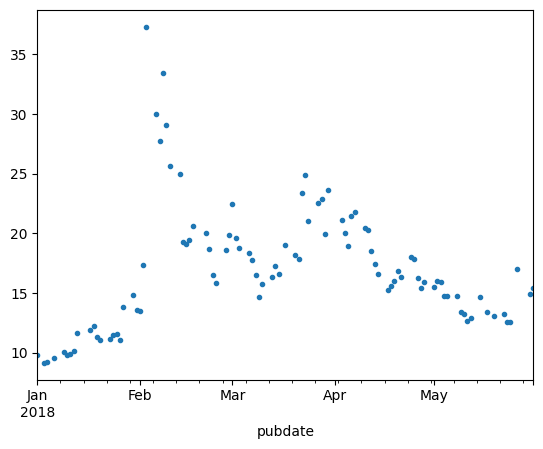

In [34]:
ts_vix = df_all.VIXCLS.drop_duplicates()
ts_vix.plot(style='.')

In [37]:
ts_vix.loc['2018-02':]

pubdate
2018-02-01    13.47
2018-02-02    17.31
2018-02-03    37.32
2018-02-06    29.98
2018-02-07    27.73
              ...  
2018-05-23    12.58
2018-05-24    12.53
2018-05-26    17.02
2018-05-30    14.94
2018-05-31    15.43
Freq: D, Name: VIXCLS, Length: 79, dtype: float64

In [40]:
dic_all_thread = 'D:\data\kaggle_news\processed\dic_all_thread.pkl'
dic_all_thread = pickle.load(open(dic_all_thread, 'rb'))

In [46]:
dic_all_thread[next(iter(dic_all_thread))]

{'site_full': 'www.cnbc.com',
 'main_image': 'https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2016/11/14/104106739-GettyImages-171532118.1910x1000.jpg',
 'site_section': 'http://www.cnbc.com/id/19746125/device/rss/rss.xml',
 'section_title': 'Top News and Analysis (pro)',
 'url': 'https://www.cnbc.com/2018/01/03/emerging-markets-are-set-for-an-even-bigger-rally-in-2018-says-one-technician.html',
 'country': 'US',
 'domain_rank': 767,
 'title': 'Emerging markets are set for an even bigger rally in 2018, says one technician',
 'performance_score': 0,
 'site': 'cnbc.com',
 'participants_count': 0,
 'title_full': '',
 'spam_score': 0.0,
 'site_type': 'blogs',
 'published': '2018-01-03T15:00:00.000+02:00',
 'replies_count': 0,
 'uuid': 'f86b78623d7a4412c76c1d80ed091184e2c29969'}

In [63]:
ts_title = pd.Series({x['published']: x['title'] for _, x in dic_all_thread.items()})
ts_title.index = pd.to_datetime(ts_title.index, utc=True)
ts_title = ts_title.sort_index()

In [59]:
pd.to_datetime('2018-02-02')

Timestamp('2018-02-02 00:00:00')

In [64]:
ts_title.loc[pd.to_datetime('2018-02-02', utc=True):pd.to_datetime('2018-02-05', utc=True)]

2018-02-02 00:00:00+00:00    Estee Lauder Raises Its Sales Forecast as Mill...
2018-02-02 00:01:00+00:00    Elon Musk sells $10 million in flamethrowers i...
2018-02-02 00:02:00+00:00    Engex, Inc. Declares Special Dividend on Commo...
2018-02-02 00:03:00+00:00    Bitcoin near bottom, will rally to $20,000 thi...
2018-02-02 00:04:00+00:00    Abbas to address U.N. Security Council on Feb....
                                                   ...                        
2018-02-04 23:41:00+00:00    No players kneel during Super Bowl national an...
2018-02-04 23:50:00+00:00    Box Office: 'Jumanji' Regains Top Spot for Mod...
2018-02-04 23:56:00+00:00    German parties to tackle labor, healthcare in ...
2018-02-04 23:58:00+00:00    German parties to tackle labour, healthcare in...
2018-02-05 00:00:00+00:00    50 percent of adults have not checked their cr...
Length: 1713, dtype: object

In [67]:
ts_title.to_csv('ts_title.csv')